### RockPaperScissors Image Classification

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D
from sklearn.model_selection import train_test_split
import os

Downloading The File

In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-25 08:43:42--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  11.7MB/s    in 30s     

2020-07-25 08:44:13 (10.3 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



Extracting The Zip File

In [ ]:
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Split The Dataset 60% for Traning and 40% Valiadation

In [ ]:
!pip install split-folders
import split_folders
split_folders.ratio('/tmp/rockpaperscissors/rps-cv-images', output="/tmp/rockpaperscissors/split", seed=1337, ratio=(0.6, 0.4))

Copying files: 2188 files [00:00, 4090.20 files/s]


Make The Directory

In [ ]:
base_dir = '/tmp/rockpaperscissors/split'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
#Directory for training
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

#Directory for validation
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')


Image Data Generator For Training and Validation

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # training directory
        target_size=(150, 150),  # Change the image resolution to 150x150 pixel
        batch_size=25,
        # The clasification's target have 3 classes, we use class_mode = 'categorical'
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # Change the image resolution to 150x150 pixel
        batch_size=25, # The clasification's target have 3 classes, we use class_mode = 'categorical
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


Build The Model

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [ ]:
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 15, 15, 256)      

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath = 'model.h5', verbose = 1, save_best_only = True)

history= model.fit(
      train_generator,
      steps_per_epoch=10,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # erapa batch yang akan dieksekusi pada setiap epoch
      callbacks = [checkpointer],
      verbose=2)

Epoch 1/20

Epoch 00001: val_loss improved from inf to 0.71131, saving model to model.h5
10/10 - 14s - loss: 0.8135 - accuracy: 0.6962 - val_loss: 0.7113 - val_accuracy: 0.7440
Epoch 2/20

Epoch 00002: val_loss improved from 0.71131 to 0.56127, saving model to model.h5
10/10 - 14s - loss: 0.5340 - accuracy: 0.8040 - val_loss: 0.5613 - val_accuracy: 0.7600
Epoch 3/20

Epoch 00003: val_loss improved from 0.56127 to 0.34777, saving model to model.h5
10/10 - 15s - loss: 0.4481 - accuracy: 0.8200 - val_loss: 0.3478 - val_accuracy: 0.8640
Epoch 4/20

Epoch 00004: val_loss improved from 0.34777 to 0.34686, saving model to model.h5
10/10 - 15s - loss: 0.2944 - accuracy: 0.9000 - val_loss: 0.3469 - val_accuracy: 0.8880
Epoch 5/20

Epoch 00005: val_loss improved from 0.34686 to 0.19882, saving model to model.h5
10/10 - 14s - loss: 0.2485 - accuracy: 0.9080 - val_loss: 0.1988 - val_accuracy: 0.9440
Epoch 6/20

Epoch 00006: val_loss improved from 0.19882 to 0.16288, saving model to model.h5
10/10 

Model Accuracy Plot

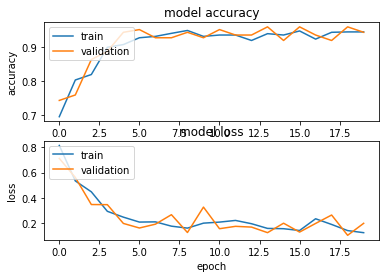

In [ ]:
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()

Image Prediction

Saving imgbin-rock-paper-scissors-hand-game-hands-hand-free-WZ7J2TxfcSFfN1KGDyqLwFd4j.jpg to imgbin-rock-paper-scissors-hand-game-hands-hand-free-WZ7J2TxfcSFfN1KGDyqLwFd4j.jpg
imgbin-rock-paper-scissors-hand-game-hands-hand-free-WZ7J2TxfcSFfN1KGDyqLwFd4j.jpg
paper


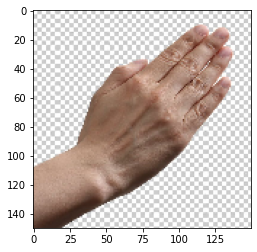

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')